# Reviews - EDA,Data Cleaning, Data Preprocessing, Feature Engineering

In [9]:
#Load necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('reviews.csv',engine='python', error_bad_lines=False) 
df.head()

C:\Users\ysadmin\AppData\Local\Temp\ipykernel_1376\2017823592.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('reviews.csv',engine='python', error_bad_lines=False)
Skipping line 219274: unexpected end of data


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [4]:
df.shape

(219272, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219272 entries, 0 to 219271
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      219272 non-null  int64 
 1   ProductId               219272 non-null  object
 2   UserId                  219272 non-null  object
 3   ProfileName             219264 non-null  object
 4   HelpfulnessNumerator    219272 non-null  int64 
 5   HelpfulnessDenominator  219272 non-null  int64 
 6   Score                   219272 non-null  int64 
 7   Time                    219272 non-null  int64 
 8   Summary                 219263 non-null  object
 9   Text                    219272 non-null  object
dtypes: int64(5), object(5)
memory usage: 16.7+ MB


In [6]:
df.tail(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
219270,219271,B000E7YPOQ,A262JCZWGAV8LY,"Michael Szczepanski ""szcz202""",2,3,5,1155427200,love it...,I love these noodles - they are perfect for ta...
219271,219272,B000E7YPOQ,A2Y6E0NYVITOVQ,CLW,0,0,5,1348531200,Excellent food at a good price,These boxes make a hearty lunch and a good siz...


In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
#dataset with missing/nullvalues

df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               8
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   9
Text                      0
dtype: int64

There are 8 datapoints having 'ProfileName' as Null.
There are 9 datapoints having 'Summary' as Null.

#Distribution of rating across the dataset

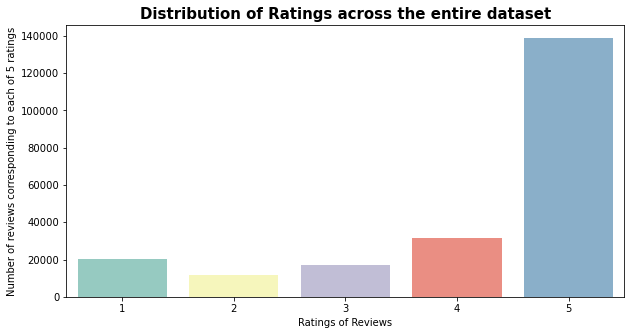

1     20136
2     11606
3     16911
4     31771
5    138848
Name: Score, dtype: int64


In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['Score'], palette=sns.color_palette("Set3", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

print(df['Score'].value_counts().sort_index());

The Highest and lowest rating for the products shows that highest product  has 138848 ratings with(5 score) and lowest product  has 20136 ratings with(1 score) 

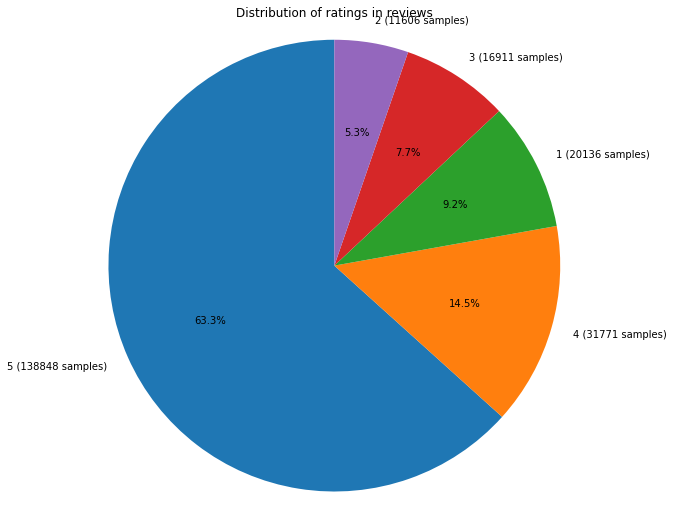

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Score"].value_counts()[k]} samples)' for k in df['Score'].value_counts().keys()]
sizes = dict(df['Score'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of ratings in reviews")
plt.show();

In the above pie chart it is clear that;
a)77.8 percent of the reviews in the dataset are positive reviews having ratings >3 (4 and 5)
b)14.5 percent of the reviews in the dataset are negative reviews having ratings <3 (1 and 2)
c)Remaining 7.7 percent reviews have a rating of 3.
d)Since a major portion of the reviews are positive, we can say that most of the users have a good experience with their purchases.

# DATA CLEANING

In [18]:
#Duplicated reviews
duplicated_reviews = df.duplicated(subset=["UserId","Time","Text"], keep='first')
duplicated_reviews.value_counts()

False    175396
True      43876
dtype: int64

In [19]:
#Remove duplicated reviews
df = df[~duplicated_reviews]

print(f"Updated No. of Datapoints : {df.shape[0]}")

Updated No. of Datapoints : 175396


#Classifying the sentiment class based on Score

In [20]:
df.loc[df["Score"] > 3, 'Sentiment_Class'] = 'Positive'
df.loc[df["Score"] < 3, 'Sentiment_Class'] = 'Negative'

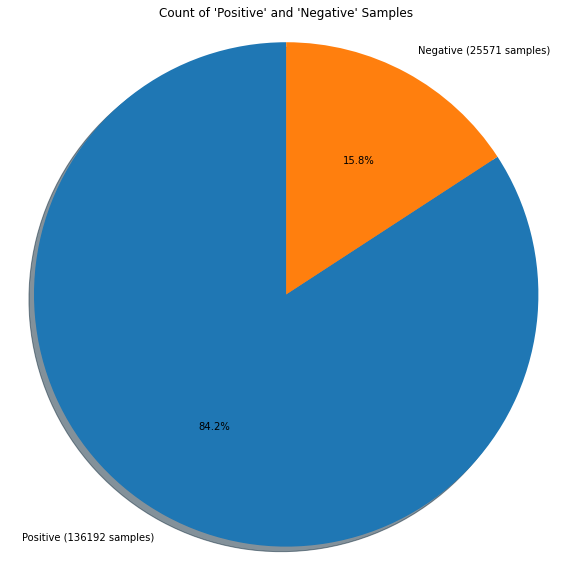

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Sentiment_Class"].value_counts()[k]} samples)' for k in df['Sentiment_Class'].value_counts().keys()]
sizes = dict(df['Sentiment_Class'].value_counts())
sizes = sizes.values()

fig1, ax1 = plt.subplots(figsize=(10,10));
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Count of 'Positive' and 'Negative' Samples")
plt.show();

There are 84.25% of positive(Sentiment class) reviews and 15.8% of negtive(Sentiment class) reviews. 

In [23]:
df["Review_Word_Count"] = df["Text"].apply(lambda x: len(x.split()))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Class,Review_Word_Count
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,94
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,27


In [24]:
df["Helpfulness_Per"] = df[["HelpfulnessNumerator","HelpfulnessDenominator"]].apply(lambda x: ((x[0]/x[1])*100.0) if x[1] else 0.0, axis=1)
df = df.drop(["HelpfulnessNumerator","HelpfulnessDenominator"], axis=1)
df.head()

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Sentiment_Class,Review_Word_Count,Helpfulness_Per
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,48,100.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,94,100.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,41,100.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,27,0.0


In [27]:
# Assigning Helpfulness indicator
df.loc[df["Helpfulness_Per"] >= 75, 'Helpfulness_indicator'] = 'Useful'
df.loc[(df["Helpfulness_Per"] > 40) & (df["Helpfulness_Per"] < 75), 'Helpfulness_indicator'] = 'Intermediate'
df.loc[(df["Helpfulness_Per"] > 0) & (df["Helpfulness_Per"] <= 40), 'Helpfulness_indicator'] = 'Not Useful'
df.loc[df["Helpfulness_Per"] == 0, 'Helpfulness_indicator'] = 'Not Available'

df = df.drop(["Helpfulness_Per"], axis=1)

df.head()

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Sentiment_Class,Review_Word_Count,Helpfulness_indicator
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,48,Useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,31,Not Available
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,94,Useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,41,Useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,27,Not Available


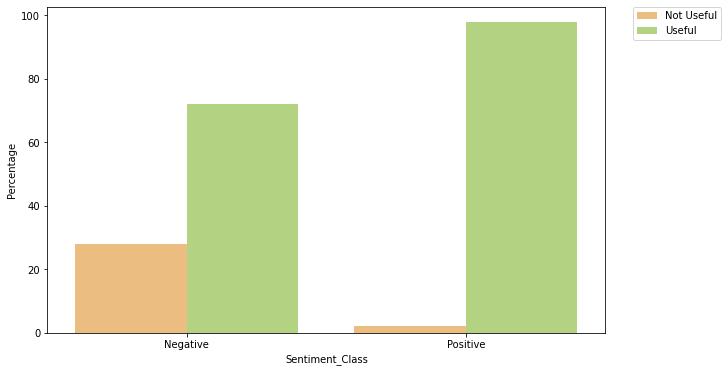

,Sentiment_Class,Helpfulness_indicator,Percentage
0,Negative,Useful,72.071717
1,Negative,Not Useful,27.928283
2,Positive,Useful,97.796653
3,Positive,Not Useful,2.203347


In [28]:
df_temp = df[(df["Helpfulness_indicator"]!= "Not Available") & (df["Helpfulness_indicator"]!= "Intermediate")]
df_temp_1 = df_temp["Helpfulness_indicator"].groupby(df_temp["Sentiment_Class"]).value_counts(normalize=True)
df_temp_1 = df_temp_1*100
df_temp_1 = df_temp_1.rename("Percentage").reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_temp_1, x="Sentiment_Class", y="Percentage", hue="Helpfulness_indicator", hue_order=["Not Useful","Useful"], palette=sns.color_palette("RdYlGn", 2));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.show()
df_temp_1

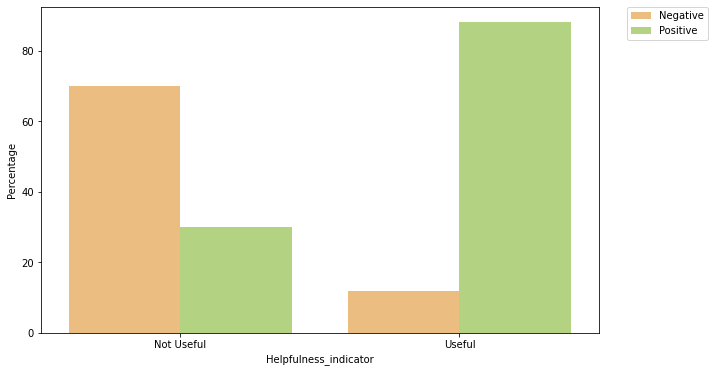

,Helpfulness_indicator,Sentiment_Class,Percentage
0,Not Useful,Negative,70.017288
1,Not Useful,Positive,29.982712
2,Useful,Positive,88.045752
3,Useful,Negative,11.954248


In [39]:
df_HI = df[(df["Helpfulness_indicator"]!= "Not Available") & (df["Helpfulness_indicator"]!= "Intermediate")]
df_sent_class = df_HI["Sentiment_Class"].groupby(df_HI["Helpfulness_indicator"]).value_counts(normalize=True)
df_sent_class = df_sent_class*100 
df_sent_class = df_sent_class.rename("Percentage").reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_sent_class, x="Helpfulness_indicator", y="Percentage", hue="Sentiment_Class", hue_order=["Negative","Positive"], palette=sns.color_palette("RdYlGn", 2));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.show()
df_sent_class

In [29]:
df['ProductId'].value_counts()

B002QWP89S    630
B001EO5Q64    566
B0013NUGDE    558
B000KV61FC    556
B005K4Q37A    541
             ... 
B000258EL0      1
B00212HT0O      1
B003VM6KT4      1
B00772YD7U      1
B001EPQ1M6      1
Name: ProductId, Length: 26504, dtype: int64

The highest product ID purchased was 630 number of times with the productID of B002QWP89S

In summary,after performing  the customer reviews analysis it is clear that product with higher ratings are comes under positive sentiment class.
If we just look at the reviews which are non-useful, we can see that the share of negative reviews are far more than the positive reviews. So, Users find the negative reviews to be less helpful in general.
If we just look at the reviews which are useful, we can see that the share of positive reviews are far more than the negative reviews. So, Users find the positive reviews to be more helpful in general.
Positive reviews are more common and are shorter.
Despite being shorter, Positive reviews are found to be more helpful.